# Filtros Analógicos

>


___

## Explicando o código:

Primeiro, importamos as bibliotecas numpy e matplotlib. Em seguida, definimos os parâmetros do filtro, incluindo a frequência de corte e a ordem do filtro.
Você pode ajustar os parâmetros do filtro e a faixa de frequência para atender às suas necessidades específicas.

## Projetando o filtro Analógico

Frequência limite da Banda de Passagem [Vermelho]: 1000.0009999999999
Frequência de Corte [Verde]: 1744.259443766764
Frequência Desejada [Amarelo]: 1000


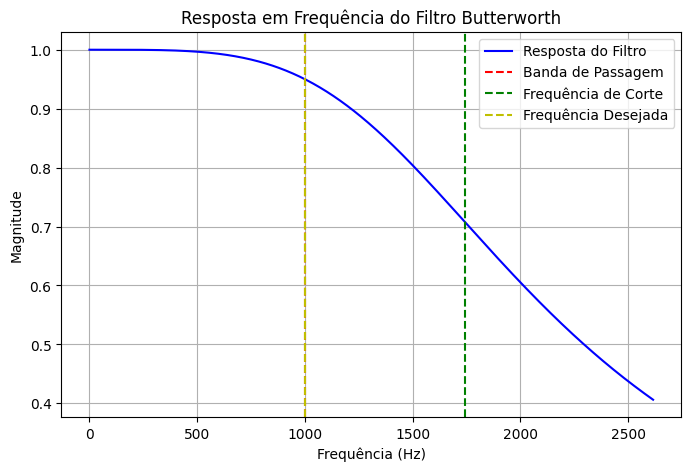

Frequência de Corte escolhida (Hz): 1744.259443766764


In [4]:
import numpy as np
import matplotlib.pyplot as plt

def findFilterAnalog(fDesejada, ordem, filterType, desvio, isBP):
    """
    Calcula a frequência de corte (omega_c) de um filtro analógico Butterworth, 
    plota a resposta em frequência com as linhas que indicam:
      - A frequência limite da banda de interesse (passagem ou rejeição)
      - A frequência de corte escolhida
      - A frequência desejada
    e retorna a frequência de corte em Hz.
    """
    # Converte a frequência desejada de Hz para rad/s
    omega_d = 2 * np.pi * fDesejada

    # Define a magnitude alvo conforme a banda de interesse:
    # - Banda de passagem: 1 - desvio
    # - Banda de rejeição: desvio
    M_target = 1 - desvio if isBP else desvio

    # Pequeno ajuste para garantir que fDesejada fique do lado correto da transição
    epsilon = 1e-6

    # Cálculo de omega_c e omega_edge conforme o tipo de filtro
    A = ((1 / (M_target**2)) - 1)**(1/(2*ordem))
    if filterType.lower() == 'lowpass':
        if isBP:
            # Para banda de passagem, ω_d deve ser menor que ω_edge
            omega_edge = omega_d * (1 + epsilon) 
        else:
            # Para banda de rejeição, ω_d deve ser maior que ω_edge
            omega_edge = omega_d * (1 - epsilon)
        omega_c = omega_edge / A
    elif filterType.lower() == 'highpass':
        if isBP:
            # Para passa-alta, banda de passagem: ω_d deve ser maior que ω_edge
            omega_edge = omega_d * (1 - epsilon)
        else:
            # Para passa-alta, banda de rejeição: ω_d deve ser menor que ω_edge
            omega_edge = omega_d * (1 + epsilon)
        omega_c = omega_edge * A
    else:
        raise ValueError("filterType deve ser 'lowpass' ou 'highpass'.")

    # Converte as frequências de rad/s para Hz
    fc_escolhido_hz = omega_c / (2 * np.pi)
    freq_limite = omega_edge / (2 * np.pi)

    # Define a faixa de frequências para o gráfico
    f_min = fDesejada / 10 if filterType.lower() == 'highpass' else 0
    f_max = max(fDesejada, fc_escolhido_hz, freq_limite) * 1.5
    freqs = np.linspace(f_min, f_max, 500)
    w = 2 * np.pi * freqs  # Converte para rad/s

    # Calcula a resposta em frequência do filtro Butterworth
    if filterType.lower() == 'lowpass':
        H = 1 / np.sqrt(1 + (w / omega_c)**(2 * ordem))
    else:  # highpass
        H = 1 / np.sqrt(1 + (omega_c / w)**(2 * ordem))

    # Cria o gráfico da resposta em frequência
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.plot(freqs, H, label='Resposta do Filtro', color='b')
    ax.set_xlabel('Frequência (Hz)')
    ax.set_ylabel('Magnitude')
    ax.set_title('Resposta em Frequência do Filtro Butterworth')

    # Plota a linha vertical da frequência limite (banda de passagem ou rejeição)
    if isBP:
        print("Frequência limite da Banda de Passagem [Vermelho]:", freq_limite)
        ax.axvline(freq_limite, color='r', linestyle='--', label='Banda de Passagem')
    else:
        print("Frequência limite da Banda de Rejeição [Vermelho]:", freq_limite)
        ax.axvline(freq_limite, color='r', linestyle='--', label='Banda de Rejeição')

    # Plota a linha vertical da frequência de corte escolhida
    print("Frequência de Corte [Verde]:", fc_escolhido_hz)
    ax.axvline(fc_escolhido_hz, color='g', linestyle='--', label='Frequência de Corte')

    # Plota a linha vertical da frequência desejada
    print("Frequência Desejada [Amarelo]:", fDesejada)
    ax.axvline(fDesejada, color='y', linestyle='--', label='Frequência Desejada')

    ax.grid(True)
    ax.legend()
    plt.show()

    return fc_escolhido_hz

if __name__ == '__main__':
    fDesejada = 1000   # Frequência desejada em Hz
    ordem = 2
    filterType = 'lowpass'  # 'lowpass' ou 'highpass'
    desvio = 0.05      # 5% de desvio
    isBP = True        # True para banda de passagem; False para rejeição

    fc = findFilterAnalog(fDesejada, ordem, filterType, desvio, isBP)
    print("Frequência de Corte escolhida (Hz):", fc)

## Topologia de Sallen-Key




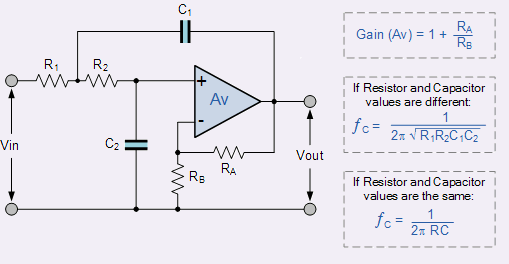

In [7]:
R = 1000
c = 1/(2*np.pi*fc*R)
print("O valor da capacitancia é: ",c)

O valor da capacitancia é:  9.124499435026533e-08
